# 2. Частные производные

In [1]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**2 + c**8*b

print(diff(f, a))

2*a + 5*b - cos(c)


In [2]:
# 2.4
# 2. Найдите частные производные:

a, b = symbols('a b', real=True)
f = (5-a-2*b)**2

print(diff(f, a))
print(diff(f, b))

2*a + 4*b - 10
4*a + 8*b - 20


In [8]:
# 2.5
# Вычислите частные производные для функции  в точке (1,1).

x,y = symbols('x y', real=True)
f = x**2+3*x*y+4*y**2

dx = diff(f, x)
dy = diff(f, y)
print(dx.subs([(x,1),(y,1)]))
print(dy.subs([(x,1),(y,1)]))

5
11


# 3. Безусловные экстремумы. Функции нескольких переменных

In [10]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2+3*y**2-15,0)
eq2 = Eq(6*x*y-12, 0)
 
sol = solve([eq1, eq2], [x, y])
sol

[(-2, -1), (-1, -2), (1, 2), (2, 1)]

In [14]:
# 3.4
# Найдите экстремумы функции 
x, y = symbols('x, y')
z = 4*x**2 - 6*x*y - 34*x + 5*y**2 + 42*y + 7
eq1 = Eq(z.diff(x), 0)
eq2 = Eq(z.diff(y), 0)

sol = solve([eq1, eq2], [x, y])
sol

{x: 2, y: -3}

In [20]:
# 3.9
# Найдите экстремумы функции

x, y = symbols('x, y')
z = x**3 + y**3 - 3*x*y
eq1 = Eq(z.diff(x), 0)
eq2 = Eq(z.diff(y), 0)

sol = solve([eq1, eq2], [x, y])
print(sol)

print(z.diff(x).diff(x))
print(z.diff(x).diff(y))
print(z.diff(y).diff(y))

[(0, 0), (1, 1), ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2), ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)]
6*x
-3
6*y


# 4. Введение в оптимизацию

Для того чтобы решать задачи оптимизации с помощью Python, можно использовать пакет SciPy Optimize (scipy.optimize) библиотеки SciPy. Он позволяет реализовывать все основные методы оптимизации, которые чаще всего используются в прикладных задачах.

Функция Розенброка, или, как её ещё называют, функция банана или функция долины, является популярной тестовой задачей для алгоритмов оптимизации на основе градиента. Вы встретитесь с ней ещё не раз, так как её часто используют в качестве эталонного теста для оценки методов оптимизации. Интересно, что придумана она была в 1960 году, то есть уже более 60 лет её используют подобным образом. Мы берём именно эту функцию, потому что она оптимальна для проверки качества алгоритмов

In [21]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

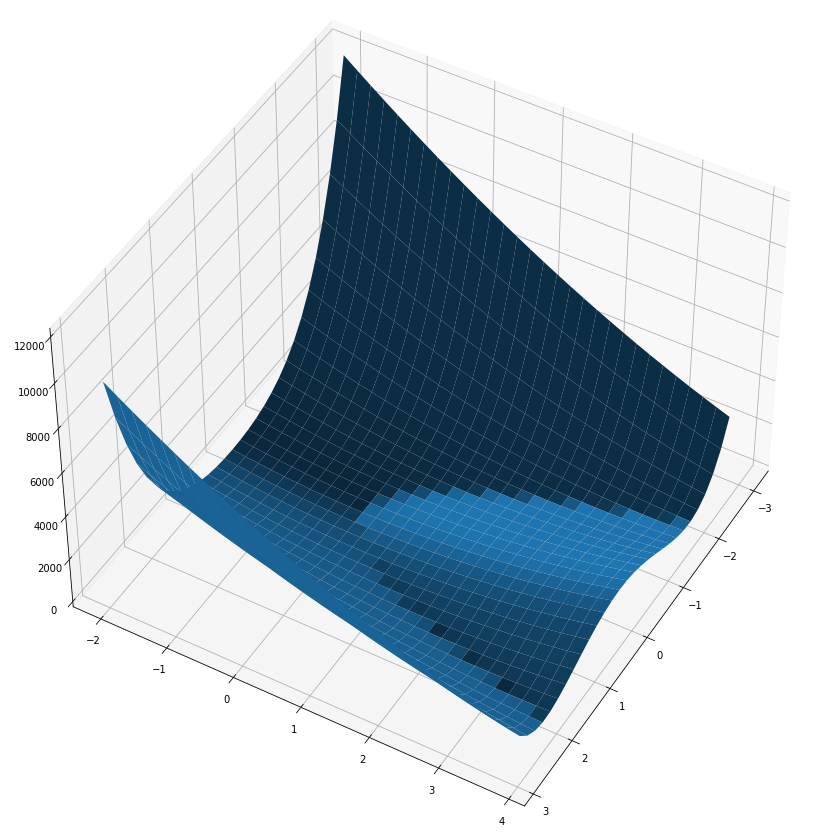

In [22]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

Алгоритмом оптимизации, в котором вычисляются только значения функций, является метод Пауэлла. Чтобы использовать его, необходимо установить method = 'powell' в функции minim.

In [23]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


In [24]:
# Допустим, у нас есть некоторая точка x0 в пятимерном пространстве. 
# Найдём ближайшую к ней точку минимума функции Розенброка, 
# используя алгоритм метода Нелдера — Мида (также его называют симплекс-методом):

from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [27]:
# 4.5
# Оптимизируйте функцию Розенброка с помощью уже известного вам метода наименьших квадратов с использованием той же точки, 
# которая фигурировала в наших решениях до этого.

# Для реализации этого алгоритма используется функция least_squares

from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)
print(result_point.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076161]


# 5. Условные экстремумы. Метод Лагранжа

In [28]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

#Целевая функция для аргументов a и b :
#f =  3*a**2 + a + 5*b**2 + 4*b
#Функция ограничений:  a + b - 200 = 0
#Функция Лагранжа :
#3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
#df/da = 6*a + w + 1 = 0
#df/db = 10*b + w + 4 = 0
#df/dw = a + b - 200 = 0
#Стационарная точка M(x,y):
#125.1875 , 74.8125

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [30]:
# 5.3
# Представьте, что вы решаете задачу классификации методом опорных векторов 
# и хотите оценить расстояние от объекта до разделяющей прямой с помощью метода Лагранжа. 
# Если объект имеет координаты , а прямая задана уравнением , то каким будет квадрат расстояния от этого объекта до прямой?


from sympy import *
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w)
sols

[(1.00000000000000, 0.0, 0.707106781186548)]

In [40]:
# 5.4
# Прямоугольный параллелепипед имеет объём 1 м3& Чему равна минимальная площадь его поверхности?

from sympy import *
a,b,c,w=symbols(' a b c w' )
g = 2*(a*b+a*c+b*c)
q = a*b*c - 1
f = g + w*q
fa = f.diff(a)
fb = f.diff(b)
fc = f.diff(c)
fw = f.diff(w)
sols = solve([fa,fb,fc, fw],a,b,c,w)
solve(g,sols[0][0],sols[0][1],sols[0][2])
a = sols[0][0]
b = sols[0][1]
c = sols[0][2]
2*(a*b+a*c+b*c)

6

In [41]:
from sympy import *
a,b,c,x,y,w=symbols('a b c x y w' )
fa = -x+a+b
fb=-y+a
fc=2*b*c
fx=x+y-10
fy = -x + 6 + c
sols = solve([fa,fb,fc,fx,fy],a,b,c,x,y,w)
print(sols[0])

(4, 2, 0, 6, 4, w)


# 6. Градиент и антиградиент

Для вычисления градиента в Python есть специальная функция — gradient() из библиотеки NumPy. Градиент вычисляется на заданной N-мерной сетке с шагом, который можно задать вручную.

In [42]:
import numpy as np

In [43]:
f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)
 
np.gradient(f)

# array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_80451/4090211407.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)


array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [44]:
print(f[1] - f[0], f[-1] - f[-2])

# (4.0, 11.0)

4.0 11.0


In [45]:
(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

12.0

In [47]:
np.gradient(f, 2)

# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))
#2.75
#4.0
#5.5
#6.0

2.75
4.0
5.5
6.0


In [49]:
# 6.5
a,b = symbols(' a b')
f = (5-a-2*b)**2
print(f.diff(a))
print(f.diff(b))

2*a + 4*b - 10
4*a + 8*b - 20


In [50]:
# 6.6
w0, w1 = symbols(' w0 w1')
L = (2.1-w0-w1)**2 + (2.9-w0-3*w1)**2 + (4.1-w0-5*w1)**2
print(L.diff(w0))
print(L.diff(w1))

6.0*w0 + 18.0*w1 - 18.2
18.0*w0 + 70.0*w1 - 62.6


In [51]:
# 6.7
# Пусть дан одномерный массив
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
             
# Вычислите градиент массива f, увеличив шаг сетки в семь раз, и укажите значение седьмого элемента массива получившихся градиентов f

np.gradient(f,7)

array([-0.85714286,  0.        ,  0.07142857, -0.21428571,  0.21428571,
        0.        ,  0.64285714,  1.42857143])

# 7. Градиент и градиентный спуск

In [52]:
# Мы разобрались с тем, как работает градиентный спуск в теории. 
# Теперь давайте рассмотрим визуализацию данного процесса. 
# Определим простейшую выпуклую функцию. В ней нет ничего особенного, но она очень удобна в визуальном плане:

def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

In [53]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

In [56]:
# Также запрограммируем простейший вариант для градиентного спуска:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

In [57]:
# Напишем функцию, которая будет строить график:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

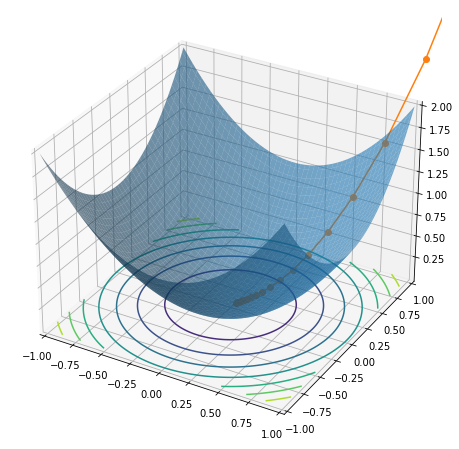

In [58]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

### ГРАДИЕНТНЫЙ СПУСК С MOMENTUM

# 8. Практика: градиентный спуск

In [63]:
# 8.1
# Найдите минимум функции  с помощью градиентного спуска

def f(x, y):
    return 2*x**2-4*x*y+y**4+2
def grad(x, y):
    dx = 4*x-4*y
    dy = -4*x+4*y**3
    return (dx, dy)

x0 = (1,5)
gamma = 0.01
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if i > 1000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.4f}, {x_cur[1]:.4f});"
          f" f(x)={f(*x_cur):.4f}; grad f(x)=({grad(*x_cur)[0]:.4f}, {grad(*x_cur)[1]:.4f})")

iter=1; x=(1.1600, 0.0400); f(x)=4.5056; grad f(x)=(4.4800, -4.6397)
iter=2; x=(1.1152, 0.0864); f(x)=4.1020; grad f(x)=(4.1152, -4.4582)
iter=3; x=(1.0740, 0.1310); f(x)=3.7447; grad f(x)=(3.7723, -4.2872)
iter=4; x=(1.0363, 0.1739); f(x)=3.4282; grad f(x)=(3.4499, -4.1243)
iter=5; x=(1.0018, 0.2151); f(x)=3.1475; grad f(x)=(3.1469, -3.9675)
iter=6; x=(0.9704, 0.2548); f(x)=2.8985; grad f(x)=(2.8623, -3.8153)
iter=7; x=(0.9417, 0.2929); f(x)=2.6777; grad f(x)=(2.5952, -3.6664)
iter=8; x=(0.9158, 0.3296); f(x)=2.4818; grad f(x)=(2.3448, -3.5199)
iter=9; x=(0.8923, 0.3648); f(x)=2.3082; grad f(x)=(2.1102, -3.3752)
iter=10; x=(0.8712, 0.3985); f(x)=2.1544; grad f(x)=(1.8908, -3.2317)
iter=11; x=(0.8523, 0.4309); f(x)=2.0185; grad f(x)=(1.6859, -3.0894)
iter=12; x=(0.8355, 0.4617); f(x)=1.8984; grad f(x)=(1.4949, -2.9481)
iter=13; x=(0.8205, 0.4912); f(x)=1.7925; grad f(x)=(1.3171, -2.8079)
iter=14; x=(0.8073, 0.5193); f(x)=1.6993; grad f(x)=(1.1521, -2.6692)
iter=15; x=(0.7958, 0.5460); 

In [65]:
# 8.2
# Найдите минимум функции  с помощью градиентного спуска

def f(x, y,z):
    return x**3-2*x**2+y**2+z**2-2*x*y+x*z-y*z+3*z
def grad(x, y, z):
    dx = 3*x**2-4*x-2*y+z
    dy = 2*y-2*x-z
    dz = 2*z+x-y+3
    return (dx, dy, dz)

x0 = (1,5,2)
gamma = 0.01
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1],
            x_cur[2] - gamma * grad(*x_cur)[2])
    if i > 1000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.4f}, {x_cur[1]:.4f}, {x_cur[2]:.4f});"
          f" f(x)={f(*x_cur):.4f}; grad f(x)=({grad(*x_cur)[0]:.4f}, {grad(*x_cur)[1]:.4f},{grad(*x_cur)[2]:.4f})")

iter=1; x=(1.0900, 4.9400, 1.9700); f(x)=14.7596; grad f(x)=(-8.7057, 5.7300,3.0900)
iter=2; x=(1.1771, 4.8827, 1.9391); f(x)=13.5980; grad f(x)=(-8.3781, 5.4722,3.1726)
iter=3; x=(1.2608, 4.8280, 1.9074); f(x)=12.5160; grad f(x)=(-8.0228, 5.2269,3.2476)
iter=4; x=(1.3411, 4.7757, 1.8749); f(x)=11.5136; grad f(x)=(-7.6454, 4.9944,3.3152)
iter=5; x=(1.4175, 4.7258, 1.8417); f(x)=10.5890; grad f(x)=(-7.2518, 4.7747,3.3752)
iter=6; x=(1.4900, 4.6780, 1.8080); f(x)=9.7398; grad f(x)=(-6.8476, 4.5680,3.4280)
iter=7; x=(1.5585, 4.6323, 1.7737); f(x)=8.9622; grad f(x)=(-6.4381, 4.3739,3.4736)
iter=8; x=(1.6229, 4.5886, 1.7390); f(x)=8.2521; grad f(x)=(-6.0284, 4.1924,3.5123)
iter=9; x=(1.6832, 4.5467, 1.7039); f(x)=7.6046; grad f(x)=(-5.6229, 4.0231,3.5442)
iter=10; x=(1.7394, 4.5064, 1.6684); f(x)=7.0148; grad f(x)=(-5.2255, 3.8657,3.5698)
iter=11; x=(1.7917, 4.4678, 1.6327); f(x)=6.4774; grad f(x)=(-4.8393, 3.7195,3.5893)
iter=12; x=(1.8401, 4.4306, 1.5968); f(x)=5.9872; grad f(x)=(-4.4672,

In [67]:
# 8.3
# Попробуем применить градиентный спуск для решения реальной задачи линейной регрессии. 
# Наша цель будет состоять в том, чтобы построить простую модель линейной регрессии 
# для прогнозирования продаж некоторого продукта на основе количества денег, потраченных на рекламу.

# Постройте модель, аналогичную той, что была разобрана в видео выше, но с тремя предикторами.

# Все веса изначально возьмите равными 0, скорость обучения задайте как 0.00005 и обучите модель на 500000 итераций.

# В качестве ответов введите полученные веса для трех предикторов. Ответы округлите до третьего знака после точки-разделителя.

import numpy as np
import pandas as pd

df = pd.read_csv('data/Advertising.csv',index_col=0)

In [69]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [88]:
X = df.drop(['sales'], axis=1)
y = df['sales']
n = len(y)
X = np.append(np.ones((n,1)), X.values.reshape(n,3), axis = 1)
y = df['sales'].values.reshape(n,1)
par = np.zeros((4,1))

In [89]:
def cost_function(X, y , par):
    y_pred = np.dot(X, par)
    error = (y_pred - y)**2
    cost = 1/(n)*np.sum(error)
    return cost

In [90]:
def grad_d(X,y, par, alpha, iterations):
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X, par)
        der = np.dot (X.transpose(), (y_pred - y))/ n
        par -= alpha * der
        costs.append(cost_function(X,y, par))
    return par, costs

In [91]:
par, costs = grad_d(X,y, par, 0.00005, 500000)

In [96]:
par

array([[ 2.86254595e+00],
       [ 4.59731305e-02],
       [ 1.89405798e-01],
       [-5.73781627e-04]])